In [16]:
%load_ext autoreload
%autoreload 3

import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import modules.constants as const
import modules.data_preparation as data_prep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
branches = pd.read_csv("rentalcalc/samples_for_case_study", index_col=0)

In [13]:
branches_minimal = branches.set_index(const.OBJECTIVE).drop([const.FITNESS_FUNCTION], axis=1)
branches_minimal

,Success,Autocorrelation for k = 1,Information content,Neutrality distance,Neutrality volume,Name
Objective,,,,,,
protect.rentalcalc202,0.0,0.253891,0.301621,18.9,76.4,Lprotect/rentalcalc/PropertyPicturesActivity;-...
protect.rentalcalc59,1.0,0.175427,0.143192,42.7,31.4,Lprotect/rentalcalc/PropertyNotesActivity;->on...


In [14]:
branches_minimal.style.to_latex(buf="table/sampled_branches.tex", caption="The branches selected for the case study", position_float="centering", hrules=True, label="case-branches", position="h", )

In [17]:
random_walks = data_prep.get_sequences_per_objective_and_fitness_function()

# Define the function that does the analysis

In [19]:
def analyse_walks_for_objective_and_fitness_function(walks, objective, fitness_function):
    n_walk = 0
    counts = {}
    for walk in walks[objective][fitness_function]:
        for val in walk:
            if val not in counts:
                counts[val] = [0 for _i in range(0, const.REPETITIONS)]
            counts[val][n_walk] += 1
        n_walk += 1

    return pd.DataFrame(counts)

# protect.rentalcalc202

In [20]:
tabl1 = analyse_walks_for_objective_and_fitness_function(random_walks, "protect.rentalcalc202", "noDistance")

In [21]:
tabl1

,0.222222,1.000000
0,683,68
1,686,65
2,690,61
3,699,52
4,697,54
5,693,58
6,694,57
7,710,41
8,693,58
9,694,57


In [22]:
tabl1.style.to_latex(buf="table/rentalcalc202levels.tex", caption="Occurrences of different fitness values in every random walk for protect.rentalcalc202", position_float="centering", hrules=True, label="202levels", position="h")

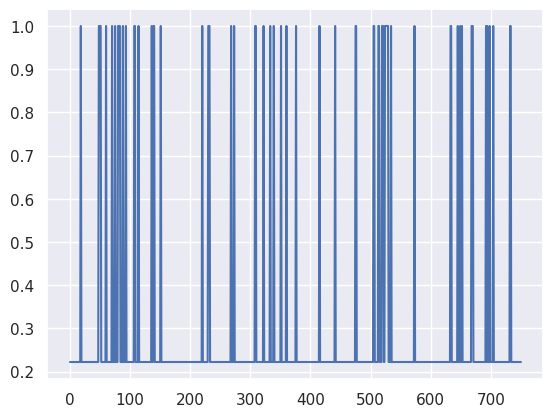

In [23]:
sns.set_theme(style="darkgrid")

fig = plt.figure()

sns.lineplot(random_walks["protect.rentalcalc202"]["noDistance"][0])
# plt.savefig(Path(const.DIAGRAM_OUT_PATH) / "rq54_neutrality_distance.pdf")
plt.close(fig)

fig

# protect.rentalcalc59

In [24]:
tabl2 = analyse_walks_for_objective_and_fitness_function(random_walks, "protect.rentalcalc59", "noDistance")

In [25]:
tabl2

,0.222222,0.333333,0.904762,1.000000
0,727,18,5,1
1,732,18,1,0
2,728,17,6,0
3,736,10,2,3
4,732,10,4,5
5,726,12,10,3
6,733,13,5,0
7,744,4,3,0
8,731,11,7,2
9,730,10,11,0


In [26]:
tabl2.style.to_latex(buf="table/rentalcalc59levels.tex", caption="Occurrences of different fitness values in every random walk for protect.rentalcalc59", position_float="centering", hrules=True, label="59levels", position="h")